In [92]:
import pandas as pd
df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [93]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_data

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0
5,29.7,450.0
6,29.7,500.0
7,30.0,390.0
8,30.0,450.0
9,30.7,500.0


In [94]:
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [96]:
# 0/1 대신 이름 자체를 활용해 전처리하기
fish_target = df.loc[cond, ['Species']]
fish_target
# 섞고 쪼개는 과정을 메소드 활용해 압축하기
# train_test_split(): 입력받은 리스트/배열을 훈련/데이터 세트로 알아서 나눠줌

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream
5,Bream
6,Bream
7,Bream
8,Bream
9,Bream


In [19]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target)
# 인덱스 무작위로 섞고 >> 비율대로 train/test 구분해줌 >> 리스트로 나온 것 4등분해야 함
# 각각 리스트로 묶인 것을 순서대로 객체에 할당하겠단 것임
# 3:1로 나뉘게 됨
len(train_input)
len(test_input)

13

In [29]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(train_input, train_target['Species'])
kn.score(test_input, test_target['Species']) 

1.0

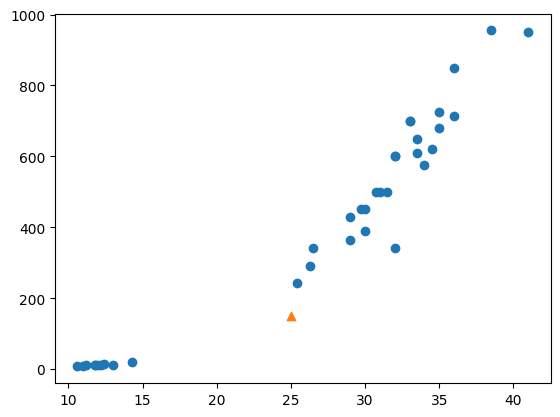

In [34]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker = '^') # 마커 옵션: 산점도의 점 모양 변경

In [37]:
kn.kneighbors([[25, 150]])

C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.73859415, 137.17988191, 138.32150953,
         138.39320793]]),
 array([[ 2, 21, 24,  8, 25]]))

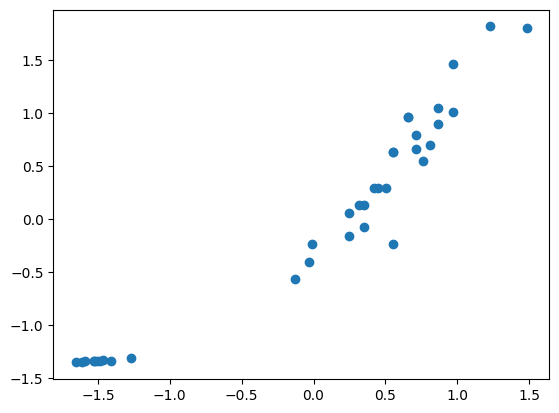

In [45]:
#표준점수 만들기: -평균 / 표준편차(std)

# 평균, 표준편차 구하기
mean = train_input.mean()
std = train_input.std()

train_scaled = (train_input - mean) / std # 각 값에서 평균 빼고, std로 나눈 값이 나옴 >> 그럼 표준점수로 변환되는 것
    # 스케일이 일정히 바뀐 데이터인 것

plt.scatter(train_scaled['Length2'], train_scaled['Weight'])
# x, y축 변경돼 표시됨 >> 그럼 다른 자료와 비교 더 명확히 할 수 있음 

In [47]:
kn.fit(train_scaled, train_target['Species']) # 표준점수로 학습시키기

test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target['Species']) # 평가하는 데이터도 표준점수화 시켜야 함

1.0

In [49]:
new = ([25, 150] - mean) / std
new
kn.predict([new])

C:\Users\1-08\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

### 연습문제
- Adelie와 Gentoo 구분하기

In [270]:
import seaborn as sns

df = sns.load_dataset('penguins')
df.notna().sum()
cond = df['species'].isin(['Adelie', 'Gentoo']) # 컬럼 선택한 뒤, 해당 컬럼에 이런 범주 있는지 묻기
df_copy = df[cond].dropna()
df_copy.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
# 표준점수 만들기
l = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for i in l:
   (i - df_copy.loc[cond, [{i}]].mean()) / df_copy.loc[cond, [{i}]].std()

In [256]:
# 효과적으로 구분할 수 있는 특성 고르기(산포도)
    # bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g
target = df_copy.loc[cond, ['species']]

# 학습 데이터 생성
data = df_copy.loc[cond, ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values.tolist()

# target 전처리하기 
train_input, test_input, train_target, test_target = train_test_split(data, target)
     # 잘 구분됐는지 확인하는 법: list 갯수는 len()으로 셀 수 있음
         # len(train_input) # 207개
         # len(test_input) # 69개

In [251]:
# 표준편차 차이 비교해보기
df_copy.pivot_table(index='species',\
                    values=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],\
                    aggfunc='std')

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm
species,,,,
Adelie,1.219338,2.662597,458.620135,6.521825
Gentoo,0.985998,3.106116,501.476154,6.585431


In [259]:
# # 표준점수로 만들어서 비교하기
# train_input.mean()
data

[[39.1, 18.7, 181.0, 3750.0],
 [39.5, 17.4, 186.0, 3800.0],
 [40.3, 18.0, 195.0, 3250.0],
 [36.7, 19.3, 193.0, 3450.0],
 [39.3, 20.6, 190.0, 3650.0],
 [38.9, 17.8, 181.0, 3625.0],
 [39.2, 19.6, 195.0, 4675.0],
 [41.1, 17.6, 182.0, 3200.0],
 [38.6, 21.2, 191.0, 3800.0],
 [34.6, 21.1, 198.0, 4400.0],
 [36.6, 17.8, 185.0, 3700.0],
 [38.7, 19.0, 195.0, 3450.0],
 [42.5, 20.7, 197.0, 4500.0],
 [34.4, 18.4, 184.0, 3325.0],
 [46.0, 21.5, 194.0, 4200.0],
 [37.8, 18.3, 174.0, 3400.0],
 [37.7, 18.7, 180.0, 3600.0],
 [35.9, 19.2, 189.0, 3800.0],
 [38.2, 18.1, 185.0, 3950.0],
 [38.8, 17.2, 180.0, 3800.0],
 [35.3, 18.9, 187.0, 3800.0],
 [40.6, 18.6, 183.0, 3550.0],
 [40.5, 17.9, 187.0, 3200.0],
 [37.9, 18.6, 172.0, 3150.0],
 [40.5, 18.9, 180.0, 3950.0],
 [39.5, 16.7, 178.0, 3250.0],
 [37.2, 18.1, 178.0, 3900.0],
 [39.5, 17.8, 188.0, 3300.0],
 [40.9, 18.9, 184.0, 3900.0],
 [36.4, 17.0, 195.0, 3325.0],
 [39.2, 21.1, 196.0, 4150.0],
 [38.8, 20.0, 190.0, 3950.0],
 [42.2, 18.5, 180.0, 3550.0],
 [37.6, 19

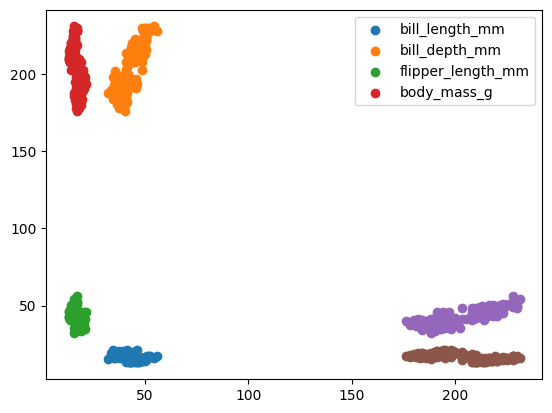

In [235]:
# for문 이용하기 -> 는 답이 아닌 듯?
import numpy as np
train_input_np = np.array(train_input)
train_input_np

for i in range(0,3):
    for j in range(0,3):
        if j != i:
            plt.scatter(train_input_np[:, i], train_input_np[:, j])
            plt.legend(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

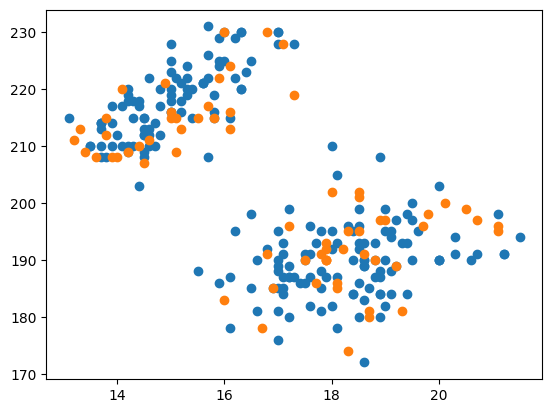

In [248]:
# 가장 차이 뚜렷한 것 활용하기
data = df_copy.loc[cond, ['bill_depth_mm', 'flipper_length_mm']].values.tolist()
target = df_copy.loc[cond, ['species']]
train_input, test_input, train_target, test_target = train_test_split(data, target)

train_input_np = np.array(train_input)
test_input_np = np.array(test_input)

plt.scatter(train_input_np[:, 0], train_input_np[:, 1])
plt.scatter(test_input_np[:, 0], test_input_np[:, 1])

In [249]:
from sklearn.neighbors import KNeighborsClassifier # 클래스 가져오기
kn = KNeighborsClassifier()
kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

In [250]:
kn.score(test_input, test_target)

1.0